### Befor Functions

In [ ]:
# Function for Finding not visited smallest distance node
# This is used in dijkstra's algorithm
def minDist(dis, visi, number_of_nodes):
    mini = float('inf')
    for v in range(number_of_nodes):
        if dis[v] < mini and visi[v] == False:
            mini = dis[v]
            mini_index = v
    return mini_index


# Dijkstra's - Finding shortest path
def dijkstra(surc, graph, number_of_nodes):
    dist = [float('inf')]*(number_of_nodes)
    dist[surc] = 0
    visit = [False]*(number_of_nodes)
    for temp in range(number_of_nodes):
        u = minDist(dist, visit, number_of_nodes)
        visit[u] = True
        for child in graph[u]:
            if (visit[child] == False) and (dist[child] > dist[u] + 1):
                dist[child] = dist[u] + 1
    return dist

In [ ]:
def minDist2(min_dis):
    mini = float('inf')
    for v in min_dis:
        if min_dis[v] < mini:
            mini = min_dis[v]
            mini_index = v
    del min_dis[mini_index]
    return mini_index


# Dijkstra's - Finding shortest path
def dijkstra2(surc, graph, number_of_nodes):
    dist = [float('inf')]*(number_of_nodes)
    min_dis = dict()
    for i in range(number_of_nodes):
        min_dis[i] = dist[i]
    dist[surc] = 0
    min_dis[surc] = 0
    visit = [False]*(number_of_nodes)
    for temp in range(number_of_nodes):
        u = minDist2(min_dis)
        visit[u] = True
        for child in graph[u]:
            if (visit[child] == False) and (dist[child] > dist[u] + 1):
                dist[child] = dist[u] + 1
                if child in min_dis:
                    min_dis[child] = dist[child]
    return dist

### All Used modules and inherited data

In [1]:
# !pip install pickle-mixin

In [1]:
import gc
import pandas as pd
import math as mt
import collections
import random
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('uni1000.csv')
# print(df)
coordinatesOfNodes = df.values.tolist()
# print(coordinatesOfNodes)
numberOfNodes = len(coordinatesOfNodes)
print(numberOfNodes)

1000


### All Created Functions

In [3]:
# Function for distance
def dis(p, q):
    return mt.dist(p, q)

In [4]:
def dijkstra3(network, numberOfNodes):
    res_Lis = None
    for i in range(numberOfNodes):
        temp_dis = nx.shortest_path_length(network, i)
        dis_lis = np.array([[temp_dis[j] for j in range(numberOfNodes)]])
        if i==0:
            res_Lis = dis_lis
        else:
            res_Lis = np.append(res_Lis, dis_lis, 0)
    return res_Lis

In [5]:
# Finding Numbers of edges between neighbors of Current node.
def ei(neighbor, adjLis):
    res = 0
    for i in neighbor:
        for j in neighbor:
            if adjLis[i][j] != 0:
                res += 1
    return res


# Finding Global Clustering Coefficient
def global_clustering_coeff(network, adjLis, number_of_nodes):
    clusCoeff = 0
    for m in range(number_of_nodes):
        lis1 = collections.deque(network.neighbors(m))
        numNeig = len(lis1)
        edgeBwNeig = ei(lis1, adjLis)
        if edgeBwNeig != 0:
            dy = numNeig*(numNeig - 1)
            clusCoeff += (edgeBwNeig/dy)
    return clusCoeff

In [6]:
def total_distance(network, distance_node, target, number_of_nodes):
    total_dis = 0
    for sur in range(number_of_nodes):
        cou = 0
        check_dis = float('inf')
        for path in nx.all_shortest_paths(network, sur, target):
            temp_dis = 0
            cou += 1
            for i in range(1, len(path)):
                temp_dis += distance_node[path[i-1]][path[i]]
            check_dis = min(check_dis, temp_dis)
        print(f"Source : {sur}, count : {cou}")
        total_dis += check_dis
    return total_dis

In [7]:
# Creating collabrative beams in network
def collabrative(c1, c2, network, label):
    for i in label[c1]:
        for j in label[c2]:
            network.add_edge(i, j, color='r')

#### Energy-Balance

In [9]:
def probabilistic_model():
    pass

### Finding Average Clustering Coefficient And Average Path Length For Base Network

In [8]:
pos = {}
dist_btw_nodes = {}


for l in range(numberOfNodes):
    pos[l] = coordinatesOfNodes[l]


# Crating directional Graph
Wireless_network = nx.DiGraph()
# weighted_graph = nx.DiGraph()
Wireless_network.add_nodes_from(range(numberOfNodes))

# Adding edges to network
for i in range(numberOfNodes):
    for j in range(numberOfNodes):
        if i not in dist_btw_nodes:
            dist_btw_nodes[i] = [float('inf') for _ in range(numberOfNodes)]
        if j not in dist_btw_nodes:
            dist_btw_nodes[j] = [float('inf') for _ in range(numberOfNodes)]
        if i != j:
            x = dis(coordinatesOfNodes[i], coordinatesOfNodes[j])
            if x <= 30:
                dist_btw_nodes[i][j] = x
                dist_btw_nodes[j][i] = x
                Wireless_network.add_edge(i, j, color='black')

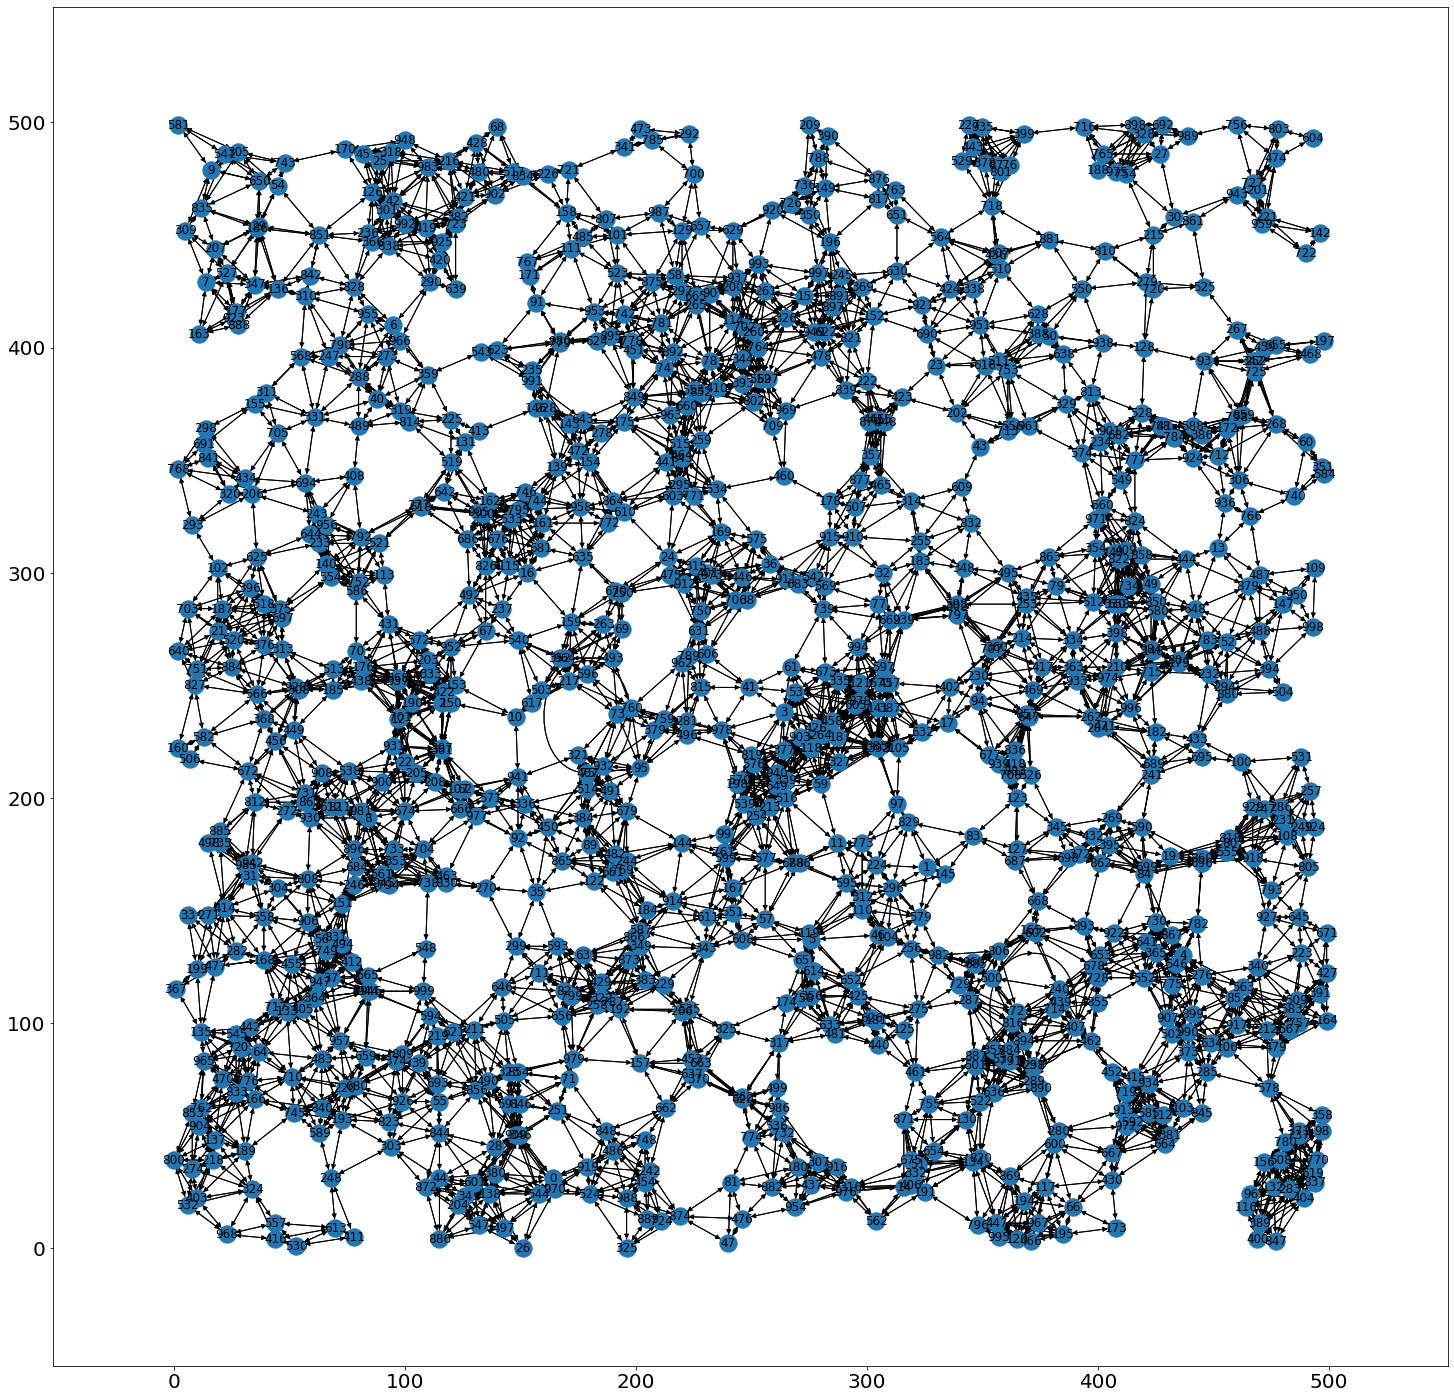

In [12]:
# Plotting figure with axes
fig, ax = plt.subplots()
nx.draw_networkx(Wireless_network, pos, with_labels = True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.tick_params(axis='both', labelsize=20)
mpl.rcParams['figure.figsize'] = (25,25)

# fig.savefig('uni1000.eps')

# fig.savefig('uni1000.pdf')
# plt.savefig('uni1000.eps')
# plt.savefig('uni1000.jpeg')

In [ ]:
# Creating random nodes
'''numberOfNodes = int(input('Number of Nodes to be deployed: '))
coordinatesOfNodes = np.array([[0, 0]])
for k in range(1, numberOfNodes):
    coordinatesOfNodes = np.append(coordinatesOfNodes, [[random.random(), random.random()]], axis = 0)
coordinatesOfNodes = 2000*coordinatesOfNodes
coordinatesOfNodes = coordinatesOfNodes.astype(int)
# coordinatesOfNodes = np.insert(coordinatesOfNodes, 0, [0,0], axis = 0)'''

"numberOfNodes = int(input('Number of Nodes to be deployed: '))\ncoordinatesOfNodes = np.array([[0, 0]])\nfor k in range(1, numberOfNodes):\n    coordinatesOfNodes = np.append(coordinatesOfNodes, [[random.random(), random.random()]], axis = 0)\ncoordinatesOfNodes = 2000*coordinatesOfNodes\ncoordinatesOfNodes = coordinatesOfNodes.astype(int)\n# coordinatesOfNodes = np.insert(coordinatesOfNodes, 0, [0,0], axis = 0)"

In [ ]:
# Creating Random Uniform nodes generation
'''coordinatesOfNodes = np.random.uniform(0,1,size = (1000,2))
coordinatesOfNodes = 500*coordinatesOfNodes
coordinatesOfNodes = coordinatesOfNodes.astype(int)'''

'coordinatesOfNodes = np.random.uniform(0,1,size = (1000,2))\ncoordinatesOfNodes = 500*coordinatesOfNodes\ncoordinatesOfNodes = coordinatesOfNodes.astype(int)'

In [9]:
# Prints Global Clustering Coefficient

cluCoeff = global_clustering_coeff(Wireless_network, nx.to_numpy_array(Wireless_network), numberOfNodes)
print(f'Global Clustering Coefficient : {cluCoeff}')

# Finding Average Clustering Coefficient
ACC = cluCoeff/numberOfNodes
print(f'Average Clustering Coefficient : {ACC}')

# Applying diskstra's
pathLis = dijkstra3(Wireless_network, numberOfNodes)

# Calculating Average Path Length
APL= (np.sum(pathLis))/((numberOfNodes-1)*(numberOfNodes))
print(f'Average Path Length : {APL}')


# df = pd.DataFrame(data=pathlis)
#print(df)

Global Clustering Coefficient : 605.1577913916143
Average Clustering Coefficient : 0.6051577913916143
Average Path Length : 11.61648848848849


In [ ]:
# print(temp_var = total_distance(Wireless_network, dist_btw_nodes, 756, numberOfNodes))

Source : 0
Source : 1
Source : 2
Source : 3
Source : 4
Source : 5
Source : 6
Source : 7
Source : 8
Source : 9
Source : 10
Source : 11
Source : 12
Source : 13
Source : 14
Source : 15
Source : 16
Source : 17
Source : 18
Source : 19
Source : 20
Source : 21
Source : 22
Source : 23
Source : 24
Source : 25
Source : 26
Source : 27
Source : 28
Source : 29
Source : 30
Source : 31
Source : 32
Source : 33
Source : 34
Source : 35
Source : 36
Source : 37
Source : 38
Source : 39
Source : 40
Source : 41
Source : 42
Source : 43
Source : 44
Source : 45
Source : 46
Source : 47
Source : 48
Source : 49
Source : 50
Source : 51
Source : 52
Source : 53
Source : 54
Source : 55
Source : 56
Source : 57
Source : 58
Source : 59
Source : 60
Source : 61
Source : 62
Source : 63
Source : 64
Source : 65
Source : 66
Source : 67
Source : 68
Source : 69
Source : 70
Source : 71
Source : 72
Source : 73
Source : 74
Source : 75
Source : 76
Source : 77
Source : 78
Source : 79
Source : 80
Source : 81
Source : 82
Source : 83
So

In [ ]:
'''j  = 0
for i in nx.all_shortest_paths(Wireless_network, 20, 756):
    j += 1
    print(f'{i}, id = {j}')'''

Streaming output truncated to the last 5000 lines.
[20, 717, 364, 412, 151, 684, 981, 22, 190, 572, 492, 16, 161, 139, 278, 849, 892, 114, 326, 891, 630, 564, 718, 76, 399, 716, 328, 989, 756], id = 3794328
[20, 133, 455, 412, 151, 684, 981, 22, 190, 572, 492, 16, 161, 139, 278, 849, 892, 114, 326, 891, 630, 564, 718, 76, 399, 716, 328, 989, 756], id = 3794329
[20, 717, 455, 412, 151, 684, 981, 22, 190, 572, 492, 16, 161, 139, 278, 849, 892, 114, 326, 891, 630, 564, 718, 76, 399, 716, 328, 989, 756], id = 3794330
[20, 133, 947, 412, 151, 684, 981, 22, 190, 572, 492, 16, 161, 139, 278, 849, 892, 114, 326, 891, 630, 564, 718, 76, 399, 716, 328, 989, 756], id = 3794331
[20, 717, 947, 412, 151, 684, 981, 22, 190, 572, 492, 16, 161, 139, 278, 849, 892, 114, 326, 891, 630, 564, 718, 76, 399, 716, 328, 989, 756], id = 3794332
[20, 64, 405, 749, 151, 684, 981, 22, 190, 572, 492, 16, 161, 139, 278, 849, 892, 114, 326, 891, 630, 564, 718, 76, 399, 716, 328, 989, 756], id = 3794333
[20, 133, 405,

KeyboardInterrupt: ignored

In [ ]:
all_poss_paths = dict(nx.all_pairs_shortest_path(Wireless_network))
all_poss_paths[0][]

[0, 28, 490, 211, 646, 299, 35, 92, 571, 361, 2]

### Finding Clusters in Network

In [ ]:
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
pos_df = pd.DataFrame(data = pos)
res_df = pos_df.T
# model = KMeans(n_clusters = 20)
# model.fit(res_df)

In [10]:
import pickle

# save the model
#pickle.dump(model, open("uni1000.pkl", "wb"))

# load the model
model = pickle.load(open("uni1000.pkl", "rb"))

In [11]:
cluster_center = model.cluster_centers_
cluster_dist = {'center1':[], 'center2':[], 'dis':[]}
for i in range(len(cluster_center)):
  for j in range(i+1, len(cluster_center)):
    temp = dis(cluster_center[i], cluster_center[j])
    if 125 <= temp <= 200:
      cluster_dist['center1'].append(i+1)
      cluster_dist['center2'].append(j+1)
      cluster_dist['dis'].append(temp)
center_repr = pd.DataFrame(cluster_dist)

In [12]:
for i in cluster_dist:
    print(f'{i} length = {len(cluster_dist[i])}')
    print(cluster_dist[i])

center1 length = 32
[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 11, 12, 12, 14, 14, 15, 16]
center2 length = 32
[4, 6, 10, 18, 5, 7, 9, 13, 18, 19, 7, 17, 19, 14, 20, 8, 11, 17, 11, 14, 18, 13, 17, 15, 18, 12, 14, 16, 15, 20, 19, 18]
dis length = 32
[195.78214851322872, 194.4192037656814, 133.82630088350828, 125.5388896672164, 165.6790613797147, 126.93132636504973, 134.1359827241473, 188.74779989489952, 190.86216632360942, 131.07412775204673, 186.35553739890636, 147.3813666578206, 177.52292800749814, 135.75023787996872, 144.33960508704848, 132.02052319828164, 138.8617086520157, 127.7978772622431, 158.11938468009194, 140.49708891387235, 131.16614490578138, 191.2228117548894, 179.10419181557555, 190.58161047096266, 141.36164799902426, 193.8470452512393, 198.68986768823413, 195.88420611969207, 192.23312019419996, 131.0561924457445, 179.50083108133305, 197.869420357859]


In [13]:
pos_df = pd.DataFrame(data = pos)
res_df = pos_df.T
# model = KMeans(n_clusters = 20)
# model.fit(res_df)

In [14]:
labels = model.predict(res_df)
label = {}
for i,ele in enumerate(labels):
    if ele in label:
        label[ele].append(i)
    else:
        label[ele] = [i]

In [15]:
res_lis = []
for i in range(20):
    res_lis.append(res_df.iloc[label[i]])

30


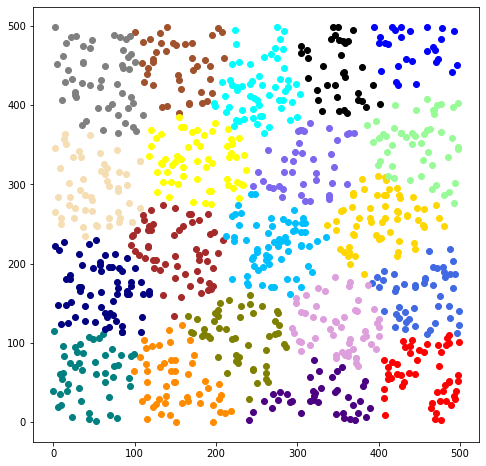

In [ ]:
colors = ['black', 'brown', 'red', 'sienna', 'darkorange', 'gold', 'wheat', 'yellow', 'olive', 'palegreen', 'grey', 'aqua', 'teal', 'deepskyblue',
         'royalblue', 'blue', 'navy', 'mediumslateblue', 'indigo', 'plum', 'purple', 'magenta', 'seagreen', 'greenyellow', 'rosybrown', 'crimson', 'tomato','maroon', 'darkkhaki','steelblue']
print(len(colors))
fig, ax = plt.subplots()

for i in range(20):
    temp = colors[i]
    plt.scatter(res_lis[i][0], res_lis[i][1], color = temp)


mpl.rcParams['figure.figsize'] = (8,8)
fig.savefig('uni_clus.eps')
fig.savefig('uni_clus1.pdf')
plt.show()
#plt.savefig('Real_field.eps')
#plt.savefig('Real_field.jpeg')

### Finging Best clusters for collabrative breamforming

In [ ]:
check_small_world = {'center_from':[], 'center_to':[], 'small_world':[],
                     'clusCoeff':[], 'SW_ACC':[], 'SW_APL':[], 'L':[], 'C':[]}

In [ ]:
# for center1, center2 in zip(cluster_dist['center2'], cluster_dist['center1']):
for center1, center2 in zip(cluster_dist['center1'], cluster_dist['center2']):
    temp_network = Wireless_network.copy()
    collabrative(center1-1, center2-1, temp_network, label)

    check_small_world['center_from'].append(center1)
    check_small_world['center_to'].append(center2)

    
    # Applying Dijkstra's Algorithm for Number of Hops
    temp_pathlis = []
    temp_adjLis= nx.to_dict_of_lists(temp_network)
    for i in range(numberOfNodes):
        temp_pathlis.append(dijkstra2(i,temp_adjLis,numberOfNodes))

    # Finding Global Clustering Coefficient
    temp_cluCoeff = global_clustering_coeff(temp_network, temp_adjLis, numberOfNodes)
    # Prints Global Clustering Coefficient
    check_small_world['clusCoeff'].append(temp_cluCoeff)

    # Finding Average Clustering Coefficient
    SW_ACC = temp_cluCoeff/numberOfNodes
    check_small_world['SW_ACC'].append(SW_ACC)


    # Calculating Average Path Length
    temp_total_sum = 0
    for i in range(numberOfNodes):
        temp_curr_sum = sum(temp_pathlis[i])
        temp_total_sum += temp_curr_sum
    SW_APL = temp_total_sum/((numberOfNodes-1)*(numberOfNodes))
    check_small_world['SW_APL'].append(SW_APL)
    L=SW_APL/APL
    check_small_world['L'].append(L)
    C=SW_ACC/ACC
    check_small_world['C'].append(C)
    S=C/L
    check_small_world['small_world'].append(S)

In [ ]:
df_small = pd.DataFrame(check_small_world)
df_small.to_csv('uni1000BF_Data1.csv')

### Introducing collaborative beamforming in network

In [16]:
collabrative(13, 17, Wireless_network, label)

In [17]:
collabrative(1, 2, Wireless_network, label)

In [18]:
collabrative(10, 12, Wireless_network, label)

In [19]:
lis = [13, 17, 3, 4, 1, 2, 10, 12]
res = []
for i in lis:
    temp = 0
    for j in label[i]:
        temp = max(temp, dis(cluster_center[i], coordinatesOfNodes[j]))
    res.append(temp)

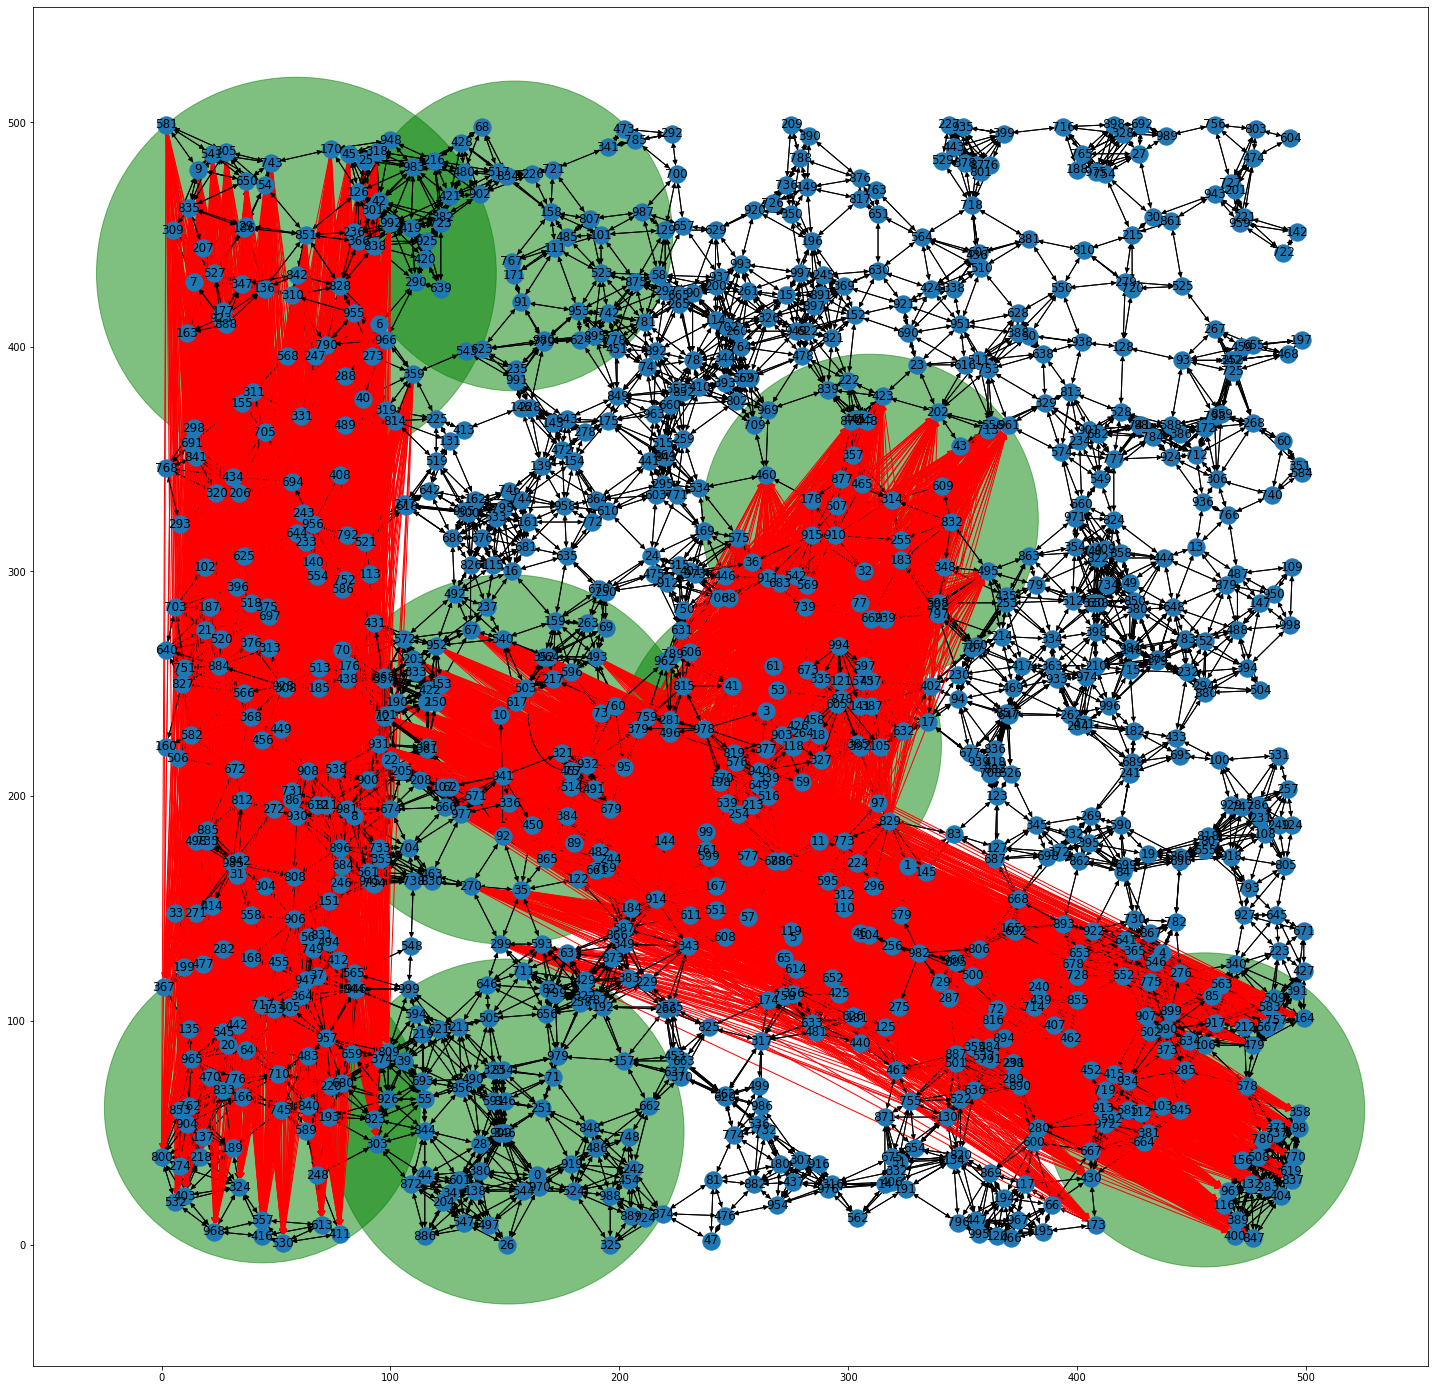

In [ ]:
edges = Wireless_network.edges()
fig, ax = plt.subplots()
for i, j in zip(res, lis):
    ax.add_patch(plt.Circle(cluster_center[j], i, fill = True,  alpha=0.5, color = 'green'))
colors = [Wireless_network[u][v]['color'] for u,v in edges]
nx.draw_networkx(Wireless_network, pos, with_labels = True, edge_color=colors)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
mpl.rcParams['figure.figsize'] = (25,25)
#plt.savefig('realNet_BF.eps')
#plt.savefig('realNet_BF.jpeg')

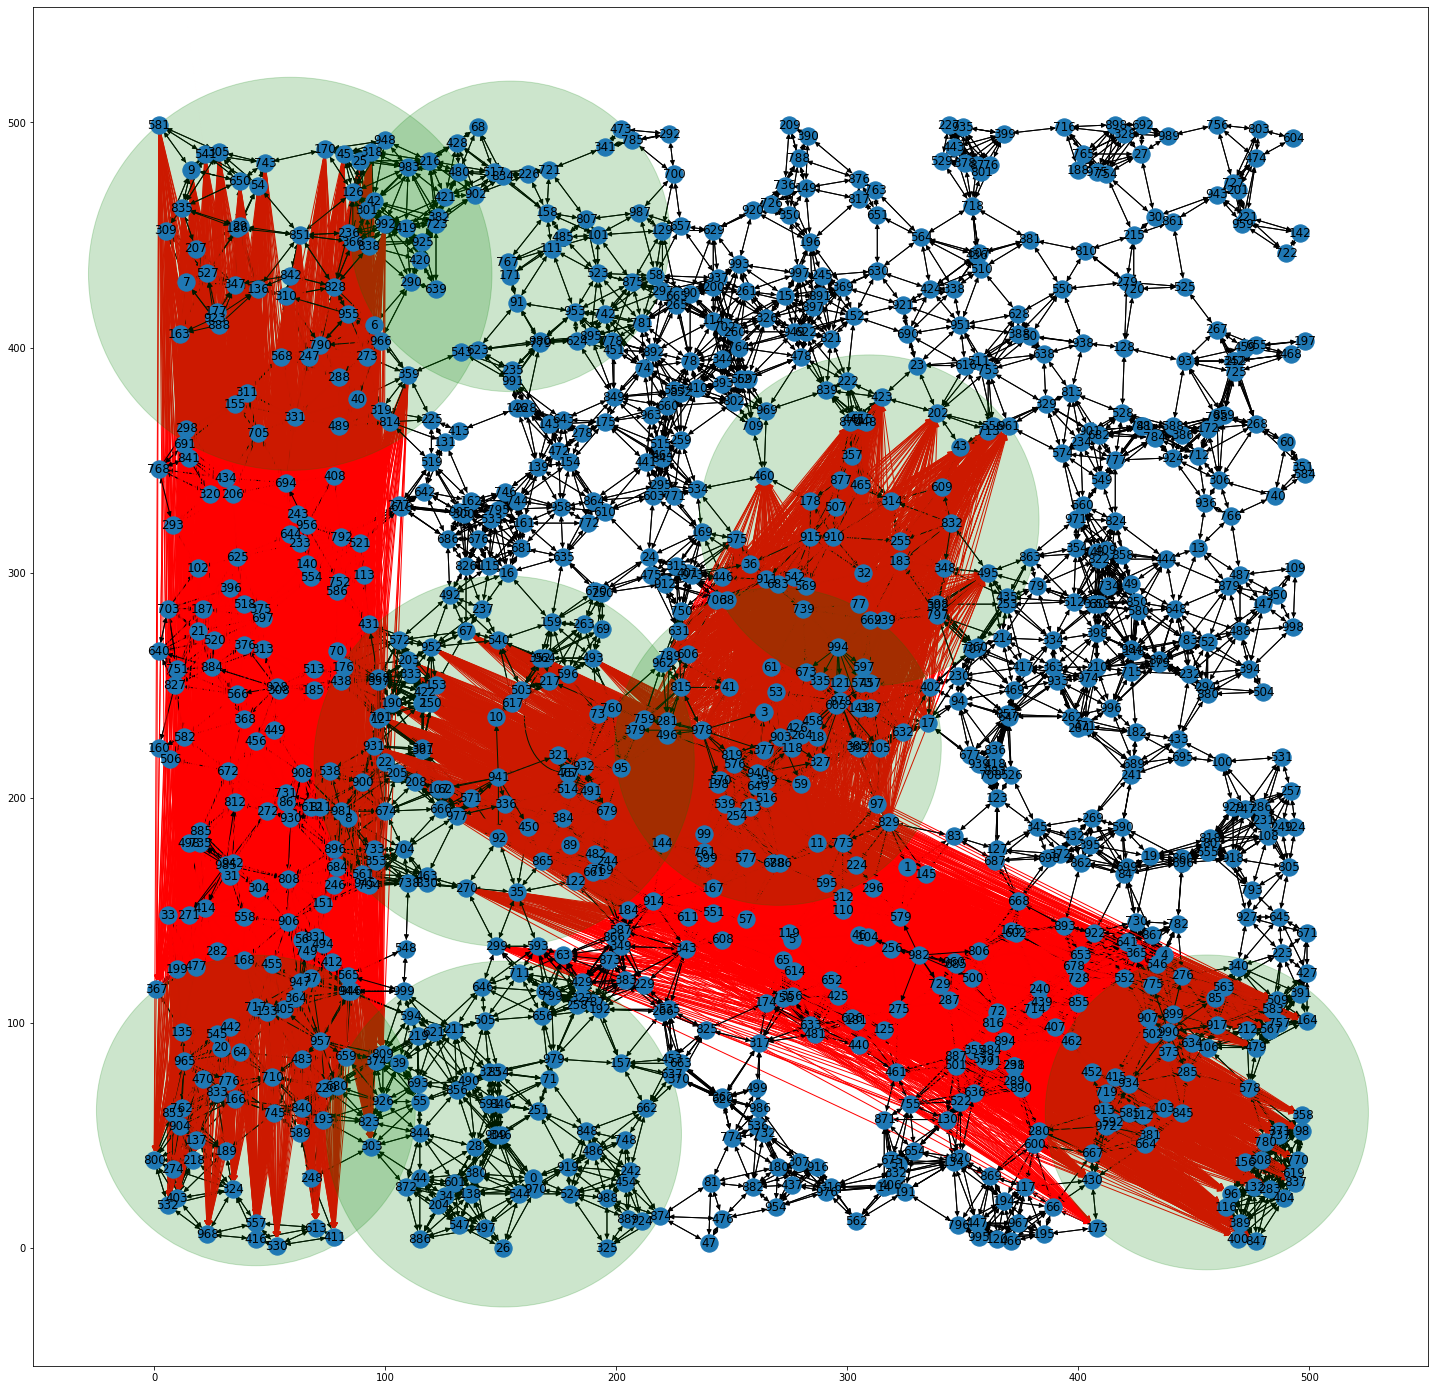

In [22]:
edges = Wireless_network.edges()
fig, ax = plt.subplots()
colors = [Wireless_network[u][v]['color'] for u,v in edges]
nx.draw_networkx(Wireless_network, pos, with_labels = True, edge_color=colors)
for i, j in zip(res, lis):
    ax.add_patch(plt.Circle(cluster_center[j], i, fill = True, alpha=0.2, color= 'green'))
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
mpl.rcParams['figure.figsize'] = (25,25)

In [ ]:
edges = Wireless_network.edges()
fig, ax = plt.subplots()
colors = [Wireless_network[u][v]['color'] for u,v in edges]
for i, j in zip(res, lis):
    ax.add_patch(plt.Circle(cluster_center[j], i, fill = False, color= 'green'))
nx.draw_networkx(Wireless_network, pos, with_labels = True, edge_color=colors)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
mpl.rcParams['figure.figsize'] = (25,25)

In [ ]:
edges = Wireless_network.edges()
fig, ax = plt.subplots()
colors = [Wireless_network[u][v]['color'] for u,v in edges]
nx.draw_networkx(Wireless_network, pos, with_labels = True, edge_color=colors)
for i, j in zip(res, lis):
    ax.add_patch(plt.Circle(cluster_center[j], i, fill = False, color= 'green'))
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
mpl.rcParams['figure.figsize'] = (25,25)

### Calculating Average Clustering Coefficient and Average Path Length after introducing collaborative beamforming in network

In [ ]:
# Prints Global Clustering Coefficient
cluCoeff = global_clustering_coeff(Wireless_network, nx.to_numpy_array(Wireless_network), numberOfNodes)
print(f'Global Clustering Coefficient : {cluCoeff}')

# Finding Average Clustering Coefficient
SW_ACC = cluCoeff/numberOfNodes
print(f' SW Average Clustering Coefficient : {SW_ACC}')

# Applying diskstra's
pathLis = dijkstra3(Wireless_network, numberOfNodes)

# Calculating Average Path Length
SW_APL= (np.sum(pathLis))/((numberOfNodes-1)*(numberOfNodes))
print(f'Average Path Length : {SW_APL}')

#df = pd.DataFrame(data=pathlis)
#print(df)

Global Clustering Coefficient : 552.9151036911612
 SW Average Clustering Coefficient : 0.5529151036911613
SW Average Path Length : 8.997169169169169


### Checking whether network is small world or not

In [ ]:
L=SW_APL/APL;
C=SW_ACC/ACC;
S=C/L;
if S>1:
    print(f'network is Small World, with S= {S}')
else:
    print('network is not a Small World')

network is Small World, with S= 1.1796652987538192


In [20]:
print(total_distance(Wireless_network, dist_btw_nodes, 756, numberOfNodes))

Source : 0, count : 59200
Source : 1, count : 800
Source : 2, count : 6000
Source : 3, count : 400
Source : 4, count : 3200
Source : 5, count : 400
Source : 6, count : 199464
Source : 7, count : 199200
Source : 8, count : 71200
Source : 9, count : 199200
Source : 10, count : 2000
Source : 11, count : 400
Source : 12, count : 4000
Source : 13, count : 116
Source : 14, count : 10000
Source : 15, count : 36
Source : 16, count : 10000
Source : 17, count : 400
Source : 18, count : 400
Source : 19, count : 6848
Source : 20, count : 1004800
Source : 21, count : 24000
Source : 22, count : 12000
Source : 23, count : 141
Source : 24, count : 7600
Source : 25, count : 201072
Source : 26, count : 32000
Source : 27, count : 1
Source : 28, count : 75200
Source : 29, count : 199200
Source : 30, count : 3
Source : 31, count : 38400
Source : 32, count : 4000
Source : 33, count : 715200
Source : 34, count : 104000
Source : 35, count : 2400
Source : 36, count : 800
Source : 37, count : 5200
Source : 38, 

Source : 308, count : 98000
Source : 309, count : 199200
Source : 310, count : 199200
Source : 311, count : 199200
Source : 312, count : 1600
Source : 313, count : 24000
Source : 314, count : 681
Source : 315, count : 1200
Source : 316, count : 3200
Source : 317, count : 1600
Source : 318, count : 201072
Source : 319, count : 219656
Source : 320, count : 285200
Source : 321, count : 1600
Source : 322, count : 800
Source : 323, count : 1600
Source : 324, count : 575200
Source : 325, count : 444800
Source : 326, count : 12
Source : 327, count : 400
Source : 328, count : 1
Source : 329, count : 292
Source : 330, count : 398
Source : 331, count : 199200
Source : 332, count : 10000
Source : 333, count : 6000
Source : 334, count : 1382
Source : 335, count : 400
Source : 336, count : 4400
Source : 337, count : 6000
Source : 338, count : 75
Source : 339, count : 400
Source : 340, count : 1600
Source : 341, count : 24
Source : 342, count : 2
Source : 343, count : 6400
Source : 344, count : 12
S

Source : 612, count : 387200
Source : 613, count : 64000
Source : 614, count : 800
Source : 615, count : 293
Source : 616, count : 20
Source : 617, count : 4000
Source : 618, count : 8000
Source : 619, count : 2692000
Source : 620, count : 1600
Source : 621, count : 72400
Source : 622, count : 48
Source : 623, count : 24
Source : 624, count : 1596
Source : 625, count : 6000
Source : 626, count : 3200
Source : 627, count : 84
Source : 628, count : 20
Source : 629, count : 348
Source : 630, count : 12
Source : 631, count : 400
Source : 632, count : 400
Source : 633, count : 4800
Source : 634, count : 212400
Source : 635, count : 2000
Source : 636, count : 6000
Source : 637, count : 12800
Source : 638, count : 102
Source : 639, count : 22464
Source : 640, count : 122000
Source : 641, count : 800
Source : 642, count : 10000
Source : 643, count : 192
Source : 644, count : 2000
Source : 645, count : 260
Source : 646, count : 43600
Source : 647, count : 2000
Source : 648, count : 164
Source :

KeyboardInterrupt: 

## Edges Between clusters

In [ ]:
Wireless_network.subgraph()